In [1]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import bokeh as bk
import plotly.express as px
import statsmodels.stats.multicomp as smm

In [2]:
BDI3 = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx')

In [3]:
Project = pd.DataFrame(BDI3)
Project.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Project.columns.tolist()

['Child ID',
 'Gender',
 'Date of Birth',
 'Location - Sub Level 1',
 'Program Label',
 'Adaptive Sum of Scaled Scores',
 'Adaptive Developmental Quotient',
 'Adaptive Percentile Rank',
 'Adaptive 95% Confidence Interval',
 'Adaptive RDI',
 'Adaptive Z-Score',
 'Adaptive T-Score',
 'Adaptive NCE',
 'Social-Emotional Sum of Scaled Scores',
 'Social-Emotional Developmental Quotient',
 'Social-Emotional Percentile Rank',
 'Social-Emotional 95% Confidence Interval',
 'Social-Emotional RDI',
 'Social-Emotional Z-Score',
 'Social-Emotional T-Score',
 'Social-Emotional NCE',
 'Communication Sum of Scaled Scores',
 'Communication Developmental Quotient',
 'Communication Percentile Rank',
 'Communication 95% Confidence Interval',
 'Communication RDI',
 'Communication Z-Score',
 'Communication T-Score',
 'Communication NCE',
 'Motor Sum of Scaled Scores',
 'Motor Developmental Quotient',
 'Motor Percentile Rank',
 'Motor 95% Confidence Interval',
 'Motor RDI',
 'Motor Z-Score',
 'Motor T-Score',

In [5]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23947 entries, 0 to 23946
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


In [6]:
scaledscores = Project[[#'Child ID',
                     #'Gender',
                     # 'Location - Sub Level 1',
                     #'Program Label',
                     #'Adaptive Sum of Scaled Scores',
                     'Adaptive-Personal Responsibility SS',
                     'Adaptive-Self Care SS',
                     #'Cognitive Sum of Scaled Scores',
                    'Cognitive-Attention and Memory SS',
                    'Cognitive-Perception and Concepts SS',
                    'Cognitive-Reasoning / Academic Skills SS',
                    #'Communication Sum of Scaled Scores',
                    'Communication-Expressive Communication SS',
                    'Communication-Receptive Communication SS',
                    #'Motor Sum of Scaled Scores',
                     'Motor-Gross Motor SS',
                     'Motor-Perceptual Motor SS',
                    #'Social-Emotional Sum of Scaled Scores',
                      'Social Emotional-Adult Interaction SS',
                      'Social Emotional-Peer Interaction SS',
                'Social Emotional-Self Concept / Social Role SS']]
                 #'BDI-3 Total Sum of Scaled Scores',]]
scores = pd.DataFrame(scaledscores)
scores

,Adaptive-Personal Responsibility SS,Adaptive-Self Care SS,Cognitive-Attention and Memory SS,Cognitive-Perception and Concepts SS,Cognitive-Reasoning / Academic Skills SS,Communication-Expressive Communication SS,Communication-Receptive Communication SS,Motor-Gross Motor SS,Motor-Perceptual Motor SS,Social Emotional-Adult Interaction SS,Social Emotional-Peer Interaction SS,Social Emotional-Self Concept / Social Role SS
0,NaN,7.0,7.0,13.0,NaN,9.0,8.0,7.0,NaN,14.0,NaN,15.0
1,9.0,7.0,9.0,7.0,14.0,9.0,10.0,7.0,11.0,12.0,9.0,11.0
2,NaN,8.0,8.0,7.0,NaN,7.0,7.0,11.0,NaN,11.0,NaN,6.0
3,NaN,13.0,14.0,10.0,NaN,8.0,8.0,5.0,NaN,10.0,NaN,11.0
4,NaN,5.0,9.0,10.0,NaN,5.0,5.0,3.0,NaN,6.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23942,NaN,13.0,9.0,15.0,NaN,12.0,12.0,11.0,NaN,13.0,NaN,12.0
23943,15.0,10.0,13.0,14.0,14.0,10.0,14.0,15.0,12.0,12.0,13.0,13.0
23944,11.0,10.0,10.0,10.0,9.0,1.0,4.0,11.0,11.0,12.0,10.0,9.0
23945,10.0,6.0,7.0,9.0,8.0,5.0,7.0,9.0,11.0,8.0,11.0,6.0


In [7]:
means = scores.describe()
scoresmeans = pd.DataFrame(means)
meanscores = scoresmeans.loc["mean"] 
df_meanscores = pd.DataFrame(meanscores)
df_meanscores

,mean
Adaptive-Personal Responsibility SS,8.023289
Adaptive-Self Care SS,7.324854
Cognitive-Attention and Memory SS,8.310377
Cognitive-Perception and Concepts SS,7.619133
Cognitive-Reasoning / Academic Skills SS,8.074317
Communication-Expressive Communication SS,6.386912
Communication-Receptive Communication SS,6.634700
Motor-Gross Motor SS,8.510260
Motor-Perceptual Motor SS,8.549520
Social Emotional-Adult Interaction SS,10.476332


In [8]:
df_meanscores.reset_index(inplace=True)
df_meanscores = df_meanscores.rename(columns={'index': 'Test'})
df_meanscores

,Test,mean
0,Adaptive-Personal Responsibility SS,8.023289
1,Adaptive-Self Care SS,7.324854
2,Cognitive-Attention and Memory SS,8.310377
3,Cognitive-Perception and Concepts SS,7.619133
4,Cognitive-Reasoning / Academic Skills SS,8.074317
5,Communication-Expressive Communication SS,6.386912
6,Communication-Receptive Communication SS,6.634700
7,Motor-Gross Motor SS,8.510260
8,Motor-Perceptual Motor SS,8.549520
9,Social Emotional-Adult Interaction SS,10.476332


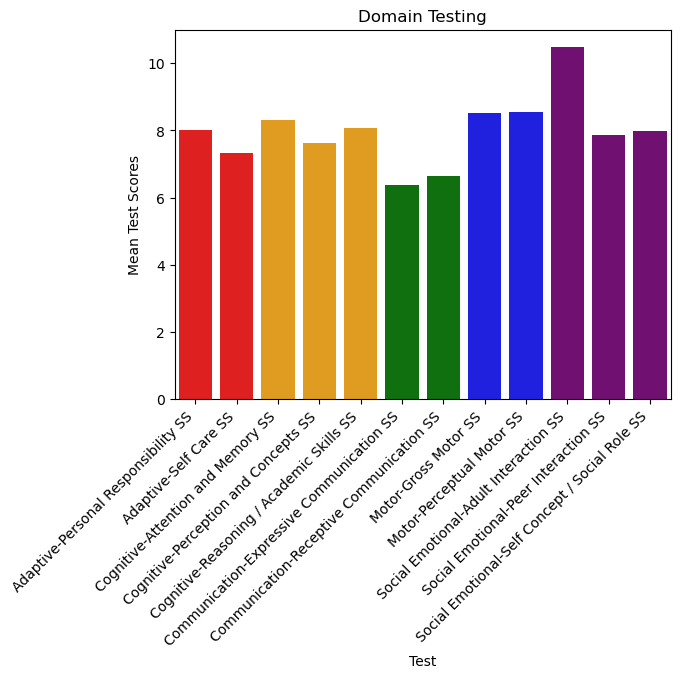

In [20]:
test_colors = {
    'Adaptive-Personal Responsibility SS': 'red',
    'Adaptive-Self Care SS': 'red',
    'Cognitive-Attention and Memory SS': 'orange',
    'Cognitive-Perception and Concepts SS': 'orange',
    'Cognitive-Reasoning / Academic Skills SS': 'orange',
    'Communication-Expressive Communication SS': 'green',
    'Communication-Receptive Communication SS': 'green',
    'Motor-Gross Motor SS': 'blue',
    'Motor-Perceptual Motor SS': 'blue',
    'Social Emotional-Adult Interaction SS': 'purple',
    'Social Emotional-Peer Interaction SS': 'purple',
    'Social Emotional-Self Concept / Social Role SS': 'purple'}

sns.barplot(x= 'Test', y='mean', palette= test_colors, data=df_meanscores)
plt.title('Domain Testing')
plt.xlabel("Test")  
plt.ylabel("Mean Test Scores") 
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
group_test = {'ADAPTIVE': ['Adaptive-Personal Responsibility SS','Adaptive-Self Care SS'],
    'COGNITIVE':['Cognitive-Attention and Memory SS','Cognitive-Perception and Concepts SS',
    'Cognitive-Reasoning / Academic Skills SS'],
    'COMMUNICATION':['Communication-Expressive Communication SS','Communication-Receptive Communication SS'],
    'MOTOR':['Motor-Gross Motor SS','Motor-Perceptual Motor SS'],
    'SOCIAL':['Social Emotional-Adult Interaction SS','Social Emotional-Peer Interaction SS',
    'Social Emotional-Self Concept / Social Role SS']}

{'ADAPTIVE': ['Adaptive-Personal Responsibility SS', 'Adaptive-Self Care SS'], 'COGNITIVE': ['Cognitive-Attention and Memory SS', 'Cognitive-Perception and Concepts SS', 'Cognitive-Reasoning / Academic Skills SS'], 'COMMUNICATION': ['Communication-Expressive Communication SS', 'Communication-Receptive Communication SS'], 'MOTOR': ['Motor-Gross Motor SS', 'Motor-Perceptual Motor SS'], 'SOCIAL': ['Social Emotional-Adult Interaction SS', 'Social Emotional-Peer Interaction SS', 'Social Emotional-Self Concept / Social Role SS']}


In [33]:
def Domain (Test):
    if Test == 'Adaptive-Personal Responsibility SS' :
        return 'ADAPTIVE'
    elif Test =='Adaptive-Self Care SS' :
        return 'ADAPTIVE'
    elif Test == 'Cognitive-Attention and Memory SS' :
        return 'COGNITIVE'
    elif Test =='Cognitive-Perception and Concepts SS' :
        return 'COGNITIVE'
    elif Test =='Cognitive-Reasoning / Academic Skills SS' :
        return 'COGNITIVE'
    elif Test == 'Communication-Expressive Communication SS' :
        return 'COMMUNICATION'
    elif Test == 'Communication-Receptive Communication SS' :
        return 'COMMUNICATION'
    elif Test == 'Motor-Gross Motor SS' :
        return 'MOTOR'
    elif Test == 'Motor-Perceptual Motor SS' :
        return 'MOTOR'
    elif Test == 'Social Emotional-Adult Interaction SS' :
        return 'SOCIAL'
    elif Test == 'Social Emotional-Peer Interaction SS' :
        return 'SOCIAL'       
    elif Test == 'Social Emotional-Self Concept / Social Role SS' :
        return 'SOCIAL'    
    else:
        return 'False'  
df_meanscores['Domain'] = df_meanscores['Test'].apply(Domain)
df_meanscores

,Test,mean,Domain
0,Adaptive-Personal Responsibility SS,8.023289,ADAPTIVE
1,Adaptive-Self Care SS,7.324854,ADAPTIVE
2,Cognitive-Attention and Memory SS,8.310377,COGNITIVE
3,Cognitive-Perception and Concepts SS,7.619133,COGNITIVE
4,Cognitive-Reasoning / Academic Skills SS,8.074317,COGNITIVE
5,Communication-Expressive Communication SS,6.386912,COMMUNICATION
6,Communication-Receptive Communication SS,6.634700,COMMUNICATION
7,Motor-Gross Motor SS,8.510260,MOTOR
8,Motor-Perceptual Motor SS,8.549520,MOTOR
9,Social Emotional-Adult Interaction SS,10.476332,SOCIAL


In [73]:
maxminmeandomain = df_meanscores.groupby('Domain').agg({'mean': ['max', 'min']})
Domaingrouped = pd.DataFrame(maxminmeandomain) 
Domaingrouped

mean          
                     max       min
Domain                            
ADAPTIVE        8.023289  7.324854
COGNITIVE       8.310377  7.619133
COMMUNICATION   6.634700  6.386912
MOTOR           8.549520  8.510260
SOCIAL         10.476332  7.858002

In [102]:
Domaingrouped['Delta'] = round(Domaingrouped[max]-Domaingrouped[min],2)

In [103]:
Domaingrouped

index         Domain       mean           Delta
                              max       min      
0     0       ADAPTIVE   8.023289  7.324854  0.69
1     1      COGNITIVE   8.310377  7.619133  0.69
2     2  COMMUNICATION   6.634700  6.386912  0.25
3     3          MOTOR   8.549520  8.510260  0.04
4     4         SOCIAL  10.476332  7.858002  2.62